In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns

## Data Load: Load home prices into a dataframe

In [2]:
df = pd.read_csv("Entities.csv")
df.head()

,Unnamed: 0,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Total_Area
0,0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,2/4/2019,NaN,NaN,1089.004
1,1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,5/4/2019,NaN,NaN,15246.056
2,2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,7/17/2019,NaN,NaN,2178.008
3,3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,4/5/2019,NaN,NaN,10890.000
4,4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,7/10/2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,2178.008


### Let's get to know the dataframe

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     168446 non-null  int64  
 1   property_id    168446 non-null  int64  
 2   location_id    168446 non-null  int64  
 3   page_url       168446 non-null  object 
 4   property_type  168446 non-null  object 
 5   price          168446 non-null  int64  
 6   location       168446 non-null  object 
 7   city           168446 non-null  object 
 8   province_name  168446 non-null  object 
 9   latitude       168446 non-null  float64
 10  longitude      168446 non-null  float64
 11  baths          168446 non-null  int64  
 12  purpose        168446 non-null  object 
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  object 
 15  agency         124375 non-null  object 
 16  agent          124374 non-null  object 
 17  Total_Area     168446 non-nul

In [4]:
df.shape

(168446, 18)

In [5]:
df.describe()

,Unnamed: 0,property_id,location_id,price,latitude,longitude,baths,bedrooms,Total_Area
count,168446.000000,1.684460e+05,168446.000000,1.684460e+05,168446.000000,168446.000000,168446.000000,168446.000000,1.684460e+05
mean,84222.500000,1.559626e+07,4375.936395,1.776576e+07,29.859519,71.239804,2.874227,3.179422,1.394239e+04
std,48626.316059,2.251207e+06,3776.561581,3.531003e+07,3.807870,3.133042,2.463400,1.971401,8.623647e+05
min,0.000000,8.657500e+04,1.000000,0.000000e+00,11.052446,25.906027,0.000000,0.000000,0.000000e+00
25%,42111.250000,1.488320e+07,1058.000000,1.750000e+05,24.948536,67.130363,0.000000,2.000000,1.905757e+03
50%,84222.500000,1.665851e+07,3286.000000,8.500000e+06,31.459784,73.056182,3.000000,3.000000,4.356016e+03
75%,126333.750000,1.708662e+07,7220.000000,1.950000e+07,33.560887,73.259870,4.000000,4.000000,1.197904e+04
max,168445.000000,1.735772e+07,14220.000000,2.000000e+09,73.184088,80.161430,403.000000,68.000000,3.387988e+08


In [6]:
df.columns

Index(['Unnamed: 0', 'property_id', 'location_id', 'page_url', 'property_type',
       'price', 'location', 'city', 'province_name', 'latitude', 'longitude',
       'baths', 'purpose', 'bedrooms', 'date_added', 'agency', 'agent',
       'Total_Area'],
      dtype='object')

In [7]:
df.city.value_counts()

Karachi       60484
Lahore        41427
Islamabad     37426
Rawalpindi    20976
Faisalabad     8133
Name: city, dtype: int64

In [8]:
df.province_name.value_counts()

Punjab               70536
Sindh                60484
Islamabad Capital    37426
Name: province_name, dtype: int64

## Drop features that are not required to build our model

In [9]:
df2 = df.drop(["Unnamed: 0","property_id","location","page_url","province_name","latitude","longitude","date_added","agency","agent"], axis = 1)
df2.head()

,location_id,property_type,price,city,baths,purpose,bedrooms,Total_Area
0,3325,Flat,10000000,Islamabad,2,For Sale,2,1089.004
1,3236,Flat,6900000,Islamabad,3,For Sale,3,15246.056
2,764,House,16500000,Islamabad,6,For Sale,5,2178.008
3,340,House,43500000,Islamabad,4,For Sale,4,10890.000
4,3226,House,7000000,Islamabad,3,For Sale,3,2178.008


## Data Cleaning

### Handle NA values

In [10]:
df2.isnull().sum()

location_id      0
property_type    0
price            0
city             0
baths            0
purpose          0
bedrooms         0
Total_Area       0
dtype: int64

### Can any house have a price of 0 ?

In [11]:
df2 = df2[~(df2["price"] == 0)]

### Can any house have a area of 0 ?

In [12]:
df2 = df2[~(df2["Total_Area"] == 0)]

### We are researching the prices of houses for sale

In [13]:
df2 = df2[~(df2["purpose"] == "For Rent")]

## Feature Engineering

In [14]:
df3 = df2.copy()

In [15]:
df3.drop("purpose",axis=1,inplace=True)

In [16]:
df3.head()

,location_id,property_type,price,city,baths,bedrooms,Total_Area
0,3325,Flat,10000000,Islamabad,2,2,1089.004
1,3236,Flat,6900000,Islamabad,3,3,15246.056
2,764,House,16500000,Islamabad,6,5,2178.008
3,340,House,43500000,Islamabad,4,4,10890.000
4,3226,House,7000000,Islamabad,3,3,2178.008


### Let's add a label that shows the total number of rooms in the houses.

In [17]:
df3["total_rooms"] = df3["baths"] + df3["bedrooms"]

### Can any house have a 0 rooms ?

In [18]:
df3 = df3[~(df3["total_rooms"] == 0)]

### Let's add a label showing the price per square meter for each house.

In [19]:
df3["price_per_sqft"] = df3["price"] / df3["Total_Area"]

In [20]:
df3.head()

,location_id,property_type,price,city,baths,bedrooms,Total_Area,total_rooms,price_per_sqft
0,3325,Flat,10000000,Islamabad,2,2,1089.004,4,9182.702727
1,3236,Flat,6900000,Islamabad,3,3,15246.056,6,452.576063
2,764,House,16500000,Islamabad,6,5,2178.008,11,7575.729749
3,340,House,43500000,Islamabad,4,4,10890.000,8,3994.490358
4,3226,House,7000000,Islamabad,3,3,2178.008,6,3213.945954


## Dimensionality Reduction

### Any location having less than 100 data points should be tagged as "other" location.

In [21]:
location_stats = df3["location_id"].value_counts(ascending = False)
location_stats

1483     1580
9030     1505
1448     1422
1447     1088
10018    1013
         ... 
8177        1
1814        1
10002       1
4401        1
4374        1
Name: location_id, Length: 3943, dtype: int64

In [22]:
len(location_stats[location_stats>100])

248

In [23]:
len(location_stats)

3943

In [24]:
len(location_stats[location_stats<=100])

3695

In [25]:
location_stats_less_than_100 = location_stats[location_stats<=100]
location_stats_less_than_100

501      100
9        100
8955     100
7         99
1047      99
        ... 
8177       1
1814       1
10002      1
4401       1
4374       1
Name: location_id, Length: 3695, dtype: int64

In [26]:
df3[df3.location_id == 999]

,location_id,property_type,price,city,baths,bedrooms,Total_Area,total_rooms,price_per_sqft


In [27]:
df3.location_id = df3.location_id.apply(lambda x: 999 if x in location_stats_less_than_100 else x)
len(df3.location_id.unique())

249

In [28]:
df3.head()

,location_id,property_type,price,city,baths,bedrooms,Total_Area,total_rooms,price_per_sqft
0,999,Flat,10000000,Islamabad,2,2,1089.004,4,9182.702727
1,999,Flat,6900000,Islamabad,3,3,15246.056,6,452.576063
2,764,House,16500000,Islamabad,6,5,2178.008,11,7575.729749
3,340,House,43500000,Islamabad,4,4,10890.000,8,3994.490358
4,3226,House,7000000,Islamabad,3,3,2178.008,6,3213.945954


## Outlier Removal Using Business Logic

### It is unusual to have 5 more bathrooms than number of bedrooms in a home

In [29]:
df4 = df3[df3.baths<df3.bedrooms+5]

In [30]:
df4.shape

(107753, 9)

In [31]:
df.location_id.median

<bound method NDFrame._add_numeric_operations.<locals>.median of 0          3325
1          3236
2           764
3           340
4          3226
          ...  
168441     6754
168442      680
168443     6757
168444     6752
168445    10045
Name: location_id, Length: 168446, dtype: int64>

## Outlier Removal Using Standard Deviation and Mean

### We should remove outliers per location using mean and one standard deviation

In [32]:
def remove_pps_outliers(df) :
    df_out = pd.DataFrame()
    for key, subdf in df.groupby("location_id") :
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft <= (m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out
df5 = remove_pps_outliers(df4)
df5.shape

(91741, 9)

### Let's check if for a given location how does the 2 baths and 3 baths property prices look like

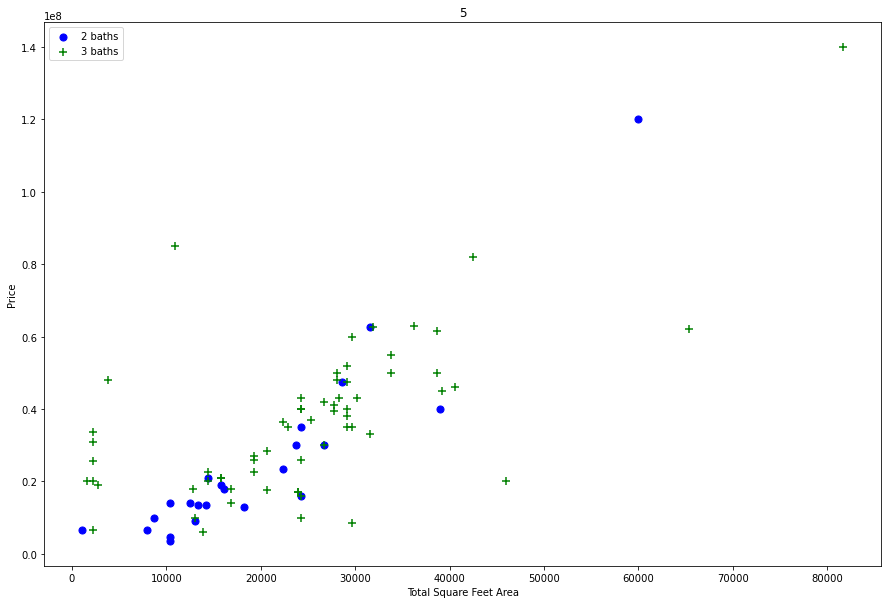

In [33]:
def plot_scatter_chart(df,location) :
    bath2 = df[(df.location_id == location) & (df.baths < 3)]
    bath3 = df[(df.location_id == location) & (df.baths >= 3)]
    matplotlib.rcParams["figure.figsize"] = (15,10)
    plt.scatter(bath2.Total_Area, bath2.price, color = "blue", label = "2 baths", s = 50)
    plt.scatter(bath3.Total_Area, bath3.price, marker = "+", color = "green", label = "3 baths", s = 50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df5, 5)

### Now we can remove those 2 baths apartments whose price_per_sqft is less than mean price_per_sqft of 1 baths apartment

In [34]:
def remove_baths_outliers(df) :
    exclude_indices = np.array([])
    for location, location_df in df.groupby("location_id") :
        baths_stats = {}
        for baths, baths_df in location_df.groupby("baths") :
            baths_stats[baths] = {
                "mean" : np.mean(baths_df.price_per_sqft),
                "std" : np.std(baths_df.price_per_sqft),
                "count" : baths_df.shape[0]
            }
        for baths, baths_df in location_df.groupby("baths"):
            stats = baths_stats.get(baths - 1)
            if stats and stats["count"]> 5 :
                exclude_indices = np.append(exclude_indices, baths_df[baths_df.price_per_sqft<(stats["mean"])].index.values)
    return df.drop(exclude_indices, axis="index")
df6 = remove_baths_outliers(df5)
df6.shape

(58719, 9)

### Plot same scatter chart again to visualize price_per_sqft for 2 baths and 3 baths properties

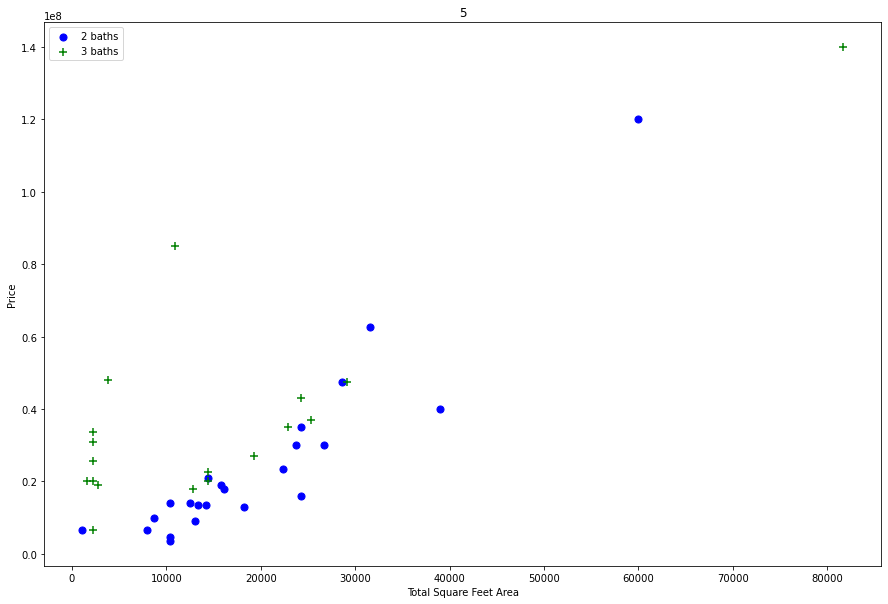

In [35]:
plot_scatter_chart(df6, 5)

In [36]:
label_list = ["price","baths","bedrooms","total_rooms","price_per_sqft"]

In [37]:
df7 = df6.copy()

In [38]:
for column in label_list :
    for location_id in df7["location_id"].unique() :
        selected_location = df7[df7["location_id"] == location_id]
        selected_column = selected_location[column]
        
        std = selected_column.std()
        avg = selected_column.mean()
        
        three_sigma_plus = avg + (std*3)
        three_sigma_minus = avg - (std*3)
        
        outliers = selected_column[(selected_location[column] > three_sigma_plus) | (selected_location[column] < three_sigma_minus)].index
        df7.drop(index = outliers, inplace = True)
        print(column, location_id, outliers)
        

price 5 Int64Index([59, 82], dtype='int64')
price 8 Int64Index([106], dtype='int64')
price 11 Int64Index([305, 345], dtype='int64')
price 12 Int64Index([354, 367, 417], dtype='int64')
price 48 Int64Index([530, 538], dtype='int64')
price 58 Int64Index([723, 734], dtype='int64')
price 67 Int64Index([777, 821, 829], dtype='int64')
price 69 Int64Index([979, 986, 1007, 1008], dtype='int64')
price 81 Int64Index([1042], dtype='int64')
price 93 Int64Index([1108, 1162], dtype='int64')
price 146 Int64Index([1404], dtype='int64')
price 156 Int64Index([1469], dtype='int64')
price 162 Int64Index([1645], dtype='int64')
price 163 Int64Index([], dtype='int64')
price 165 Int64Index([], dtype='int64')
price 166 Int64Index([], dtype='int64')
price 168 Int64Index([2174, 2175], dtype='int64')
price 174 Int64Index([2197], dtype='int64')
price 198 Int64Index([], dtype='int64')
price 224 Int64Index([], dtype='int64')
price 232 Int64Index([2697, 2778], dtype='int64')
price 233 Int64Index([3260, 3270], dtype='i

price 6648 Int64Index([], dtype='int64')
price 6654 Int64Index([], dtype='int64')
price 6655 Int64Index([75115, 75116, 75206, 75335, 75336, 75372], dtype='int64')
price 6674 Int64Index([75499], dtype='int64')
price 6686 Int64Index([75536, 75582, 75583, 75642, 75643], dtype='int64')
price 6692 Int64Index([], dtype='int64')
price 6693 Int64Index([75809, 75810, 75970], dtype='int64')
price 6727 Int64Index([76028], dtype='int64')
price 6738 Int64Index([76178, 76181], dtype='int64')
price 6754 Int64Index([], dtype='int64')
price 6760 Int64Index([], dtype='int64')
price 6825 Int64Index([], dtype='int64')
price 6826 Int64Index([76685], dtype='int64')
price 6827 Int64Index([76712, 76740, 76992], dtype='int64')
price 6828 Int64Index([77165], dtype='int64')
price 6831 Int64Index([], dtype='int64')
price 6834 Int64Index([77499], dtype='int64')
price 6836 Int64Index([77564, 77603, 77629, 77640], dtype='int64')
price 6837 Int64Index([77817, 77821, 77954], dtype='int64')
price 6838 Int64Index([78144

baths 1039 Int64Index([], dtype='int64')
baths 1050 Int64Index([], dtype='int64')
baths 1058 Int64Index([], dtype='int64')
baths 1287 Int64Index([57129], dtype='int64')
baths 1312 Int64Index([], dtype='int64')
baths 1314 Int64Index([57317], dtype='int64')
baths 1356 Int64Index([], dtype='int64')
baths 1378 Int64Index([], dtype='int64')
baths 1410 Int64Index([57947, 57948, 57961, 57962], dtype='int64')
baths 1442 Int64Index([57986, 58051], dtype='int64')
baths 1444 Int64Index([], dtype='int64')
baths 1446 Int64Index([], dtype='int64')
baths 1447 Int64Index([], dtype='int64')
baths 1448 Int64Index([], dtype='int64')
baths 1451 Int64Index([], dtype='int64')
baths 1452 Int64Index([61250, 61263, 61270, 61274, 61284], dtype='int64')
baths 1454 Int64Index([61460, 61465, 61466, 61499, 61537], dtype='int64')
baths 1466 Int64Index([61702], dtype='int64')
baths 1474 Int64Index([61776, 61780, 62141], dtype='int64')
baths 1479 Int64Index([], dtype='int64')
baths 1481 Int64Index([], dtype='int64')
b

baths 10045 Int64Index([90361, 90395, 90413], dtype='int64')
baths 10061 Int64Index([], dtype='int64')
baths 10343 Int64Index([90599, 90610, 90656], dtype='int64')
baths 10542 Int64Index([], dtype='int64')
baths 10610 Int64Index([], dtype='int64')
baths 10984 Int64Index([91007], dtype='int64')
baths 11291 Int64Index([91176, 91200, 91227], dtype='int64')
baths 11579 Int64Index([91311, 91319], dtype='int64')
baths 11704 Int64Index([91342], dtype='int64')
baths 11761 Int64Index([], dtype='int64')
baths 13026 Int64Index([], dtype='int64')
baths 13769 Int64Index([91670, 91671, 91674, 91707, 91739, 91740], dtype='int64')
bedrooms 5 Int64Index([66], dtype='int64')
bedrooms 8 Int64Index([86, 99, 104, 208], dtype='int64')
bedrooms 11 Int64Index([244], dtype='int64')
bedrooms 12 Int64Index([379, 419], dtype='int64')
bedrooms 48 Int64Index([540, 566], dtype='int64')
bedrooms 58 Int64Index([], dtype='int64')
bedrooms 67 Int64Index([], dtype='int64')
bedrooms 69 Int64Index([904], dtype='int64')
bed

bedrooms 4307 Int64Index([], dtype='int64')
bedrooms 4359 Int64Index([], dtype='int64')
bedrooms 4391 Int64Index([74209, 74219, 74222, 74223, 74228, 74229, 74232, 74236, 74321], dtype='int64')
bedrooms 4398 Int64Index([74363, 74369], dtype='int64')
bedrooms 4506 Int64Index([], dtype='int64')
bedrooms 4508 Int64Index([], dtype='int64')
bedrooms 6648 Int64Index([74909, 74910], dtype='int64')
bedrooms 6654 Int64Index([], dtype='int64')
bedrooms 6655 Int64Index([75126], dtype='int64')
bedrooms 6674 Int64Index([], dtype='int64')
bedrooms 6686 Int64Index([], dtype='int64')
bedrooms 6692 Int64Index([75681], dtype='int64')
bedrooms 6693 Int64Index([75815, 75817, 75826, 75836, 75946, 75947, 75969, 76016], dtype='int64')
bedrooms 6727 Int64Index([76029, 76032, 76168], dtype='int64')
bedrooms 6738 Int64Index([76174, 76177, 76182], dtype='int64')
bedrooms 6754 Int64Index([], dtype='int64')
bedrooms 6760 Int64Index([], dtype='int64')
bedrooms 6825 Int64Index([], dtype='int64')
bedrooms 6826 Int64In

total_rooms 781 Int64Index([], dtype='int64')
total_rooms 893 Int64Index([11873], dtype='int64')
total_rooms 999 Int64Index([16650, 17115, 17781, 18450, 23890, 26249, 29305, 29430, 32466,
            38810, 39616, 42762, 47232, 47538],
           dtype='int64')
total_rooms 1006 Int64Index([56197, 56231, 56237], dtype='int64')
total_rooms 1014 Int64Index([], dtype='int64')
total_rooms 1027 Int64Index([], dtype='int64')
total_rooms 1039 Int64Index([], dtype='int64')
total_rooms 1050 Int64Index([], dtype='int64')
total_rooms 1058 Int64Index([56830, 56835], dtype='int64')
total_rooms 1287 Int64Index([], dtype='int64')
total_rooms 1312 Int64Index([], dtype='int64')
total_rooms 1314 Int64Index([], dtype='int64')
total_rooms 1356 Int64Index([], dtype='int64')
total_rooms 1378 Int64Index([57621], dtype='int64')
total_rooms 1410 Int64Index([57772, 57776, 57877, 57878, 57914, 57926, 57929, 57930, 57960], dtype='int64')
total_rooms 1442 Int64Index([], dtype='int64')
total_rooms 1444 Int64Index([]

total_rooms 9195 Int64Index([], dtype='int64')
total_rooms 9201 Int64Index([], dtype='int64')
total_rooms 9246 Int64Index([], dtype='int64')
total_rooms 9354 Int64Index([], dtype='int64')
total_rooms 9522 Int64Index([87134, 87147], dtype='int64')
total_rooms 9582 Int64Index([], dtype='int64')
total_rooms 9889 Int64Index([], dtype='int64')
total_rooms 9914 Int64Index([], dtype='int64')
total_rooms 9996 Int64Index([87620], dtype='int64')
total_rooms 10011 Int64Index([87960, 88597], dtype='int64')
total_rooms 10018 Int64Index([88765, 88800, 88825, 88858, 89221, 89371, 89461], dtype='int64')
total_rooms 10020 Int64Index([89674], dtype='int64')
total_rooms 10021 Int64Index([89873, 89890, 89967], dtype='int64')
total_rooms 10030 Int64Index([90074, 90190], dtype='int64')
total_rooms 10045 Int64Index([90396], dtype='int64')
total_rooms 10061 Int64Index([], dtype='int64')
total_rooms 10343 Int64Index([], dtype='int64')
total_rooms 10542 Int64Index([], dtype='int64')
total_rooms 10610 Int64Index

price_per_sqft 3048 Int64Index([70668, 70669, 70699, 70745, 70806, 70843, 70866, 70901, 70922,
            71003, 71011],
           dtype='int64')
price_per_sqft 3067 Int64Index([71086], dtype='int64')
price_per_sqft 3069 Int64Index([71121, 71150], dtype='int64')
price_per_sqft 3070 Int64Index([], dtype='int64')
price_per_sqft 3074 Int64Index([71428], dtype='int64')
price_per_sqft 3102 Int64Index([], dtype='int64')
price_per_sqft 3147 Int64Index([71782], dtype='int64')
price_per_sqft 3226 Int64Index([], dtype='int64')
price_per_sqft 3241 Int64Index([], dtype='int64')
price_per_sqft 3332 Int64Index([72202, 72207, 72232], dtype='int64')
price_per_sqft 3337 Int64Index([], dtype='int64')
price_per_sqft 3338 Int64Index([72469, 72556], dtype='int64')
price_per_sqft 3348 Int64Index([], dtype='int64')
price_per_sqft 3394 Int64Index([], dtype='int64')
price_per_sqft 3395 Int64Index([], dtype='int64')
price_per_sqft 3442 Int64Index([], dtype='int64')
price_per_sqft 3748 Int64Index([73051], dtyp

In [39]:
df7.shape

(56410, 9)

## Checking relationship of city with price

In [40]:
df7.head()

,location_id,property_type,price,city,baths,bedrooms,Total_Area,total_rooms,price_per_sqft
3,5,Flat,10000000,Karachi,0,2,8712.032,2,1147.837841
4,5,Flat,9000000,Karachi,2,2,13068.048,4,688.702704
5,5,Flat,40000000,Karachi,0,4,38931.893,4,1027.435270
6,5,Flat,23500000,Karachi,0,3,22324.582,3,1052.651288
12,5,Flat,25500000,Karachi,5,4,2178.008,9,11707.945976


In [41]:
df7.city.unique()

array(['Karachi', 'Lahore', 'Islamabad', 'Rawalpindi', 'Faisalabad'],
      dtype=object)

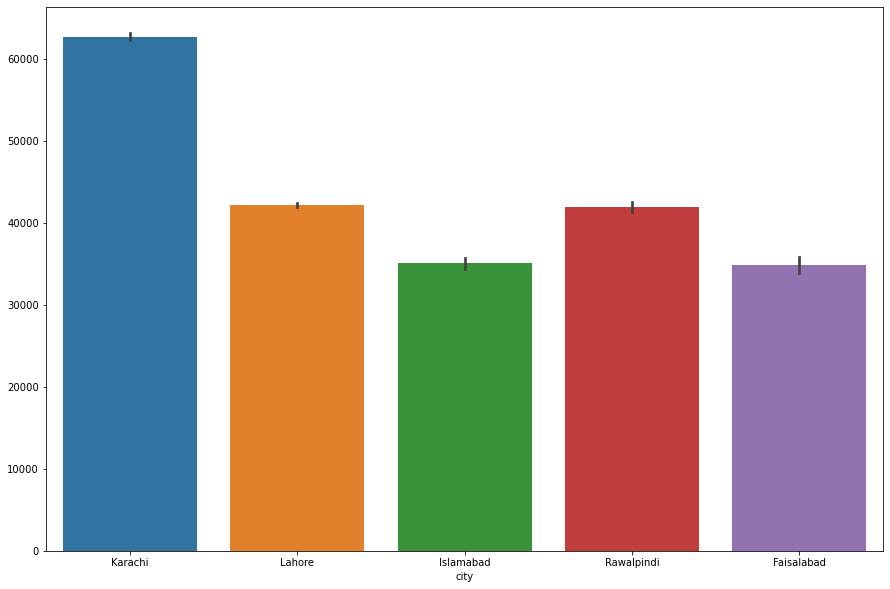

In [42]:
sns.barplot(x = "city", y = df7.city.index, data = df7);

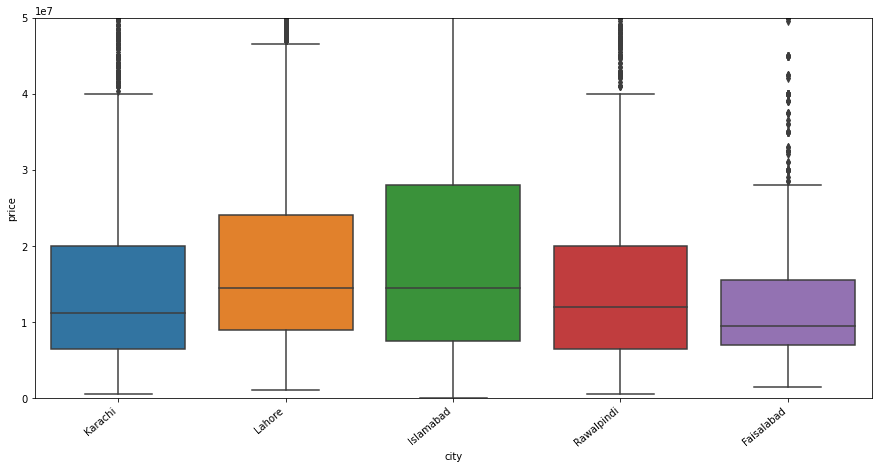

In [43]:
plt.subplots(figsize=(15,7))
plt.ylim(0,50000000)
ax=sns.boxplot(x='city',y='price',data=df7)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

## Checking relationship of property_type with price

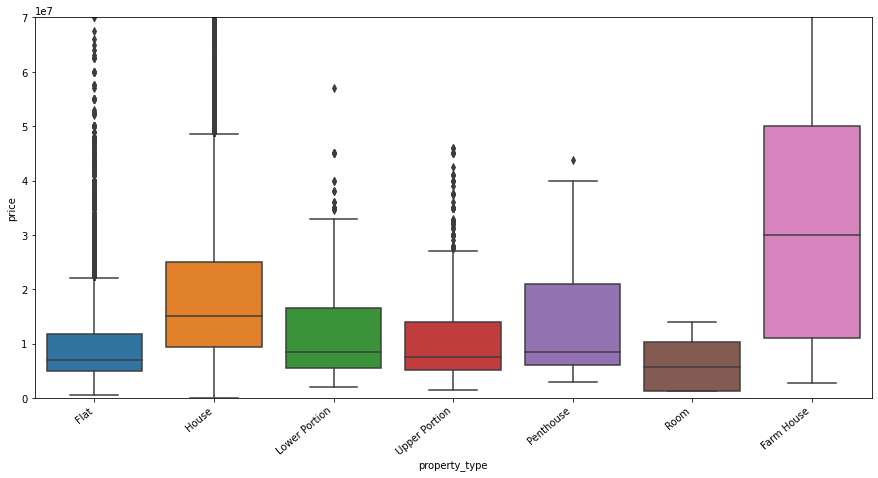

In [44]:
plt.subplots(figsize=(15,7))
plt.ylim(0,70000000)
ax=sns.boxplot(x='property_type',y='price',data=df7)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

## Relationship of price with city, and total_rooms mixed

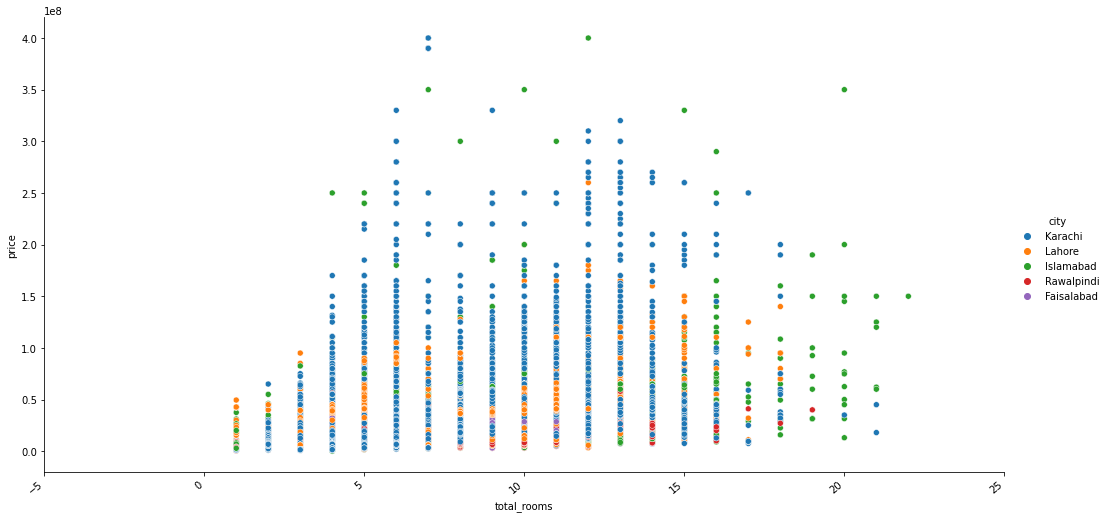

In [45]:
ax=sns.relplot(x='total_rooms',y='price',data=df7,hue='city',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

## Use Label Encoder For property_type and city

In [46]:
df8 = df7.drop(["total_rooms","price_per_sqft"], axis = "columns")
df8.head()

,location_id,property_type,price,city,baths,bedrooms,Total_Area
3,5,Flat,10000000,Karachi,0,2,8712.032
4,5,Flat,9000000,Karachi,2,2,13068.048
5,5,Flat,40000000,Karachi,0,4,38931.893
6,5,Flat,23500000,Karachi,0,3,22324.582
12,5,Flat,25500000,Karachi,5,4,2178.008


In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df9 = df8.copy()
df9["property_type"] = le.fit_transform(df9["property_type"])

In [48]:
df9["city"] = le.fit_transform(df9["city"])

## Use One Hot Encoding For Location

In [49]:
dummies = pd.get_dummies(df9.location_id)
dummies.head()

,5,8,11,12,48,58,67,69,81,93,...,10343,10542,10610,10984,11291,11579,11704,11761,13026,13769
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df10 = pd.concat([df9, dummies.drop(999,axis = "columns")], axis = "columns")
df10.head()

,location_id,property_type,price,city,baths,bedrooms,Total_Area,5,8,11,...,10343,10542,10610,10984,11291,11579,11704,11761,13026,13769
3,5,1,10000000,2,0,2,8712.032,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,9000000,2,2,2,13068.048,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,1,40000000,2,0,4,38931.893,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,5,1,23500000,2,0,3,22324.582,1,0,0,...,0,0,0,0,0,0,0,0,0,0
12,5,1,25500000,2,5,4,2178.008,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df10.drop("location_id",axis=1, inplace = True)

In [52]:
df10.head()

,property_type,price,city,baths,bedrooms,Total_Area,5,8,11,12,...,10343,10542,10610,10984,11291,11579,11704,11761,13026,13769
3,1,10000000,2,0,2,8712.032,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,9000000,2,2,2,13068.048,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,40000000,2,0,4,38931.893,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,23500000,2,0,3,22324.582,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,1,25500000,2,5,4,2178.008,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Build a Model Now

In [53]:
X = df10.drop(["price"], axis="columns")
X.head()

,property_type,city,baths,bedrooms,Total_Area,5,8,11,12,48,...,10343,10542,10610,10984,11291,11579,11704,11761,13026,13769
3,1,2,0,2,8712.032,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2,2,2,13068.048,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,2,0,4,38931.893,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,2,0,3,22324.582,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,1,2,5,4,2178.008,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
y = df10.price
y.head()

3     10000000
4      9000000
5     40000000
6     23500000
12    25500000
Name: price, dtype: int64

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

## Linear Regression Model

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.686893278964804

## Use K Fold cross validation to measure accuracy of our LinearRegression model

In [58]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.69401321, 0.69508855, 0.68427424, 0.68343822, 0.68649811])

## Ridge Regression

In [270]:
from sklearn.linear_model import Ridge

In [271]:
ridge_model = Ridge(alpha = 0.1,normalize=True).fit(X_train, y_train)
ridge_model.score(X_test, y_test)

0.6828697710994271

## Comparison of linear and decision tree algorithms

In [132]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits = 5, test_size=0.2, random_state = 0)
    for algo_name, config in algos.items() :
        gs = GridSearchCV(config["model"], config["params"], cv = cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            "model" : algo_name,
            "best_score" : gs.best_score_,
            "best_params" : gs.best_params_
        })
        
    return pd.DataFrame(scores,columns=["model","best_score","best_params"])
find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.694545,{'normalize': False}
1,decision_tree,0.933618,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [133]:
from sklearn.metrics import r2_score

In [134]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [135]:
scores[np.argmax(scores)]

0.7332261375341023

## Comparison of other algorithms

In [136]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
import xgboost
from xgboost import XGBRegressor

In [137]:
def compML(df, alg) :
    # train test ayrımı
    X = df.drop(["price"], axis="columns")
    y = df.price
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
    
    # modelleme
    model = alg().fit(X_train, y_train)
    y_pred=model.predict(X_test)
    model_ismi = alg.__name__
    print(model_ismi,":", (r2_score(y_test,y_pred)))
    

In [138]:
models = [LGBMRegressor,
         XGBRegressor,
         GradientBoostingRegressor,
         RandomForestRegressor,
         DecisionTreeRegressor,   
         KNeighborsRegressor,]

In [139]:
for i in models :
    compML(df10, i)

LGBMRegressor : 0.939307561577861
XGBRegressor : 0.9452446834107852
GradientBoostingRegressor : 0.8713442891181848
RandomForestRegressor : 0.9444556387433701
DecisionTreeRegressor : 0.9350587112442782
KNeighborsRegressor : 0.9159144099171144


In [76]:
def predict_price(location, property_type, city, baths,bedrooms,Total_Area) :
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = property_type
    x[1] = city
    x[2] = baths
    x[3] = bedrooms
    x[4] = Total_Area
    if loc_index >= 0 :
        x[loc_index] = 1
    
    return lr_clf.predict([x])[0]

In [77]:
predict_price(5,1, 2, 2,2,13068)

22626705.439403165

### Export the tested model to a pickle file

In [ ]:
import pickle
with open('home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)